In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import power_transform
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,classification_report

In [126]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


## Checking nulls and data type

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

We could observe that last column _c39 has all the null values so better we drop this feature as it wont play any role in our analysis and model building.

In [127]:
df=df.drop(['_c39'],axis=1)

## Analysing Relationship between feature and label

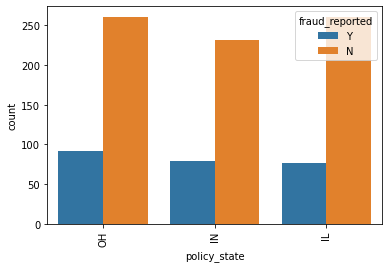

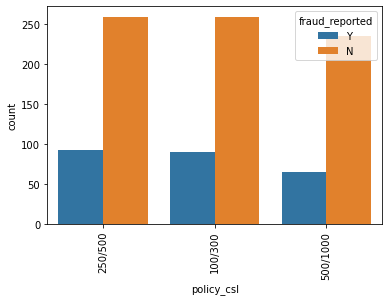

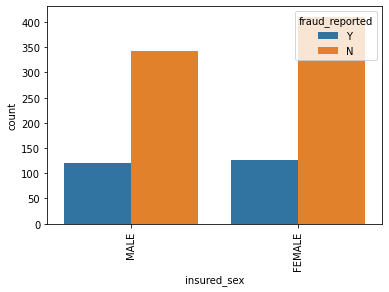

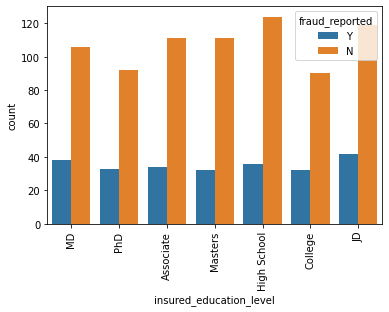

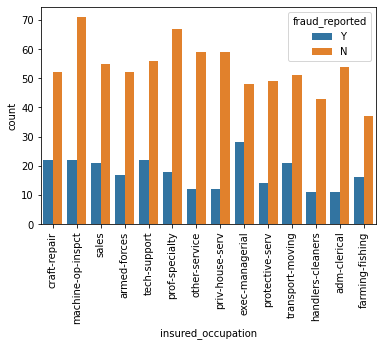

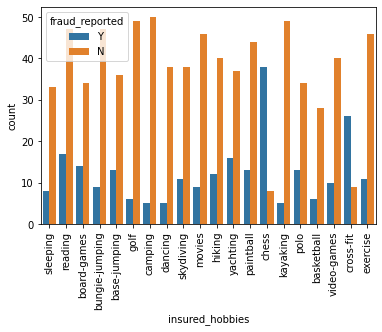

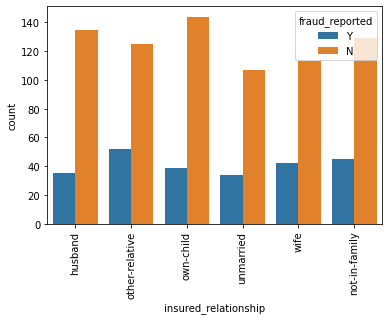

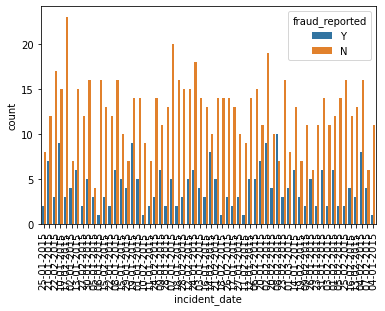

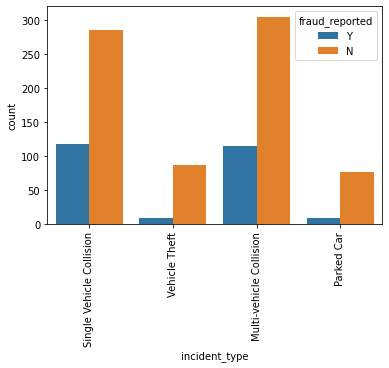

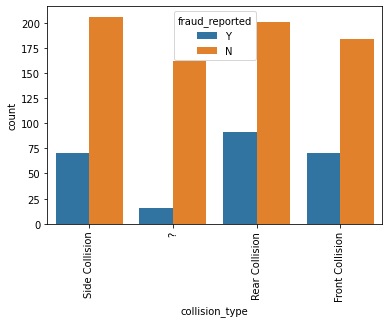

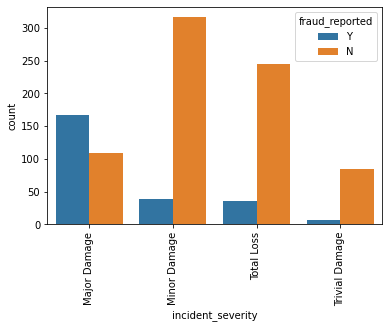

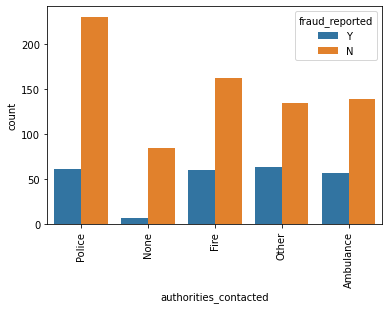

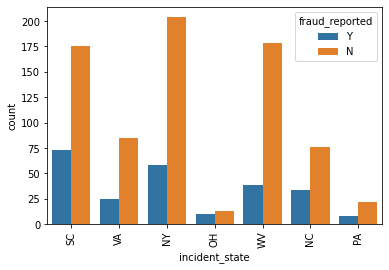

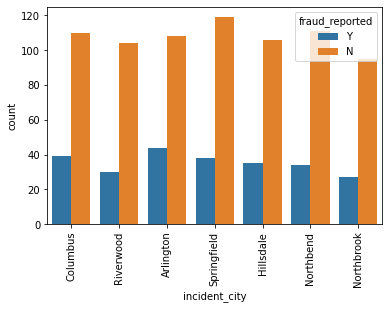

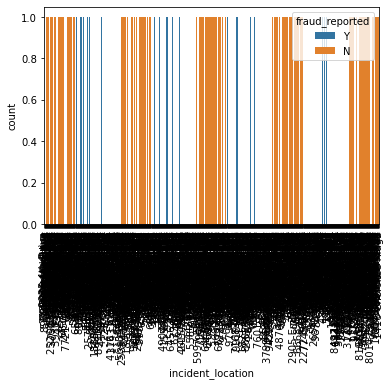

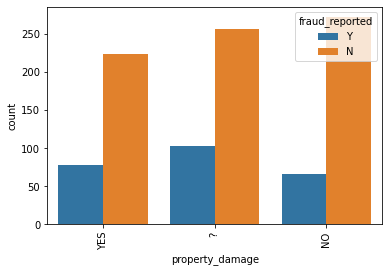

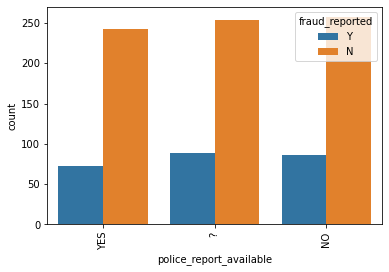

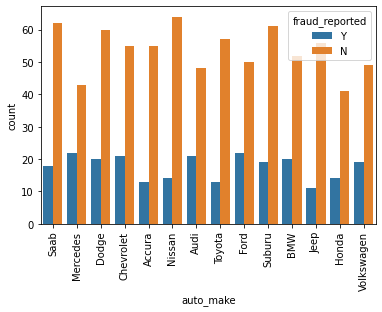

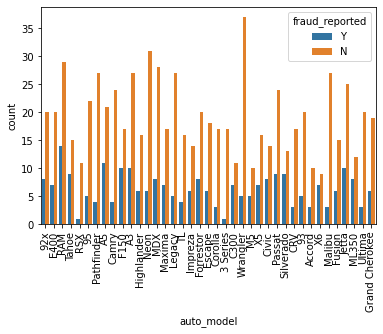

In [128]:
category=['policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship',
         'incident_date','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','incident_location','property_damage',
         'police_report_available','auto_make','auto_model']
#Plotting count plot for each feature
for i in category:
    a=sns.countplot(x=df[i],hue=df['fraud_reported'],data=df)
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.show()

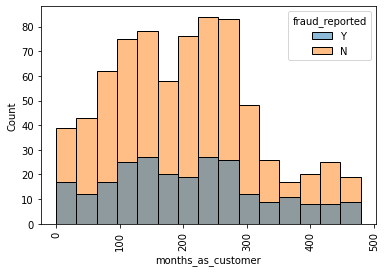

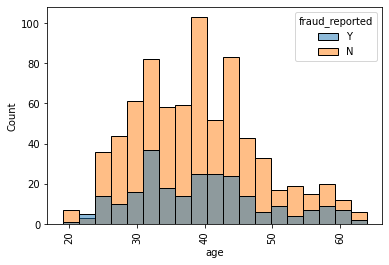

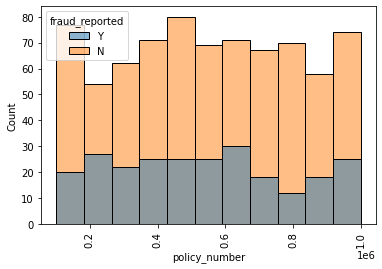

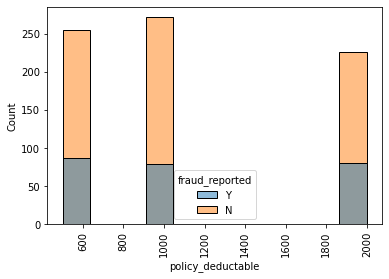

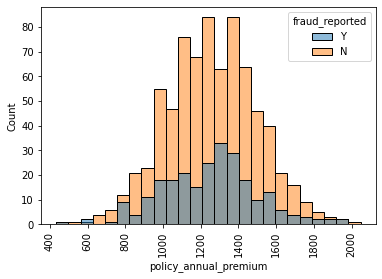

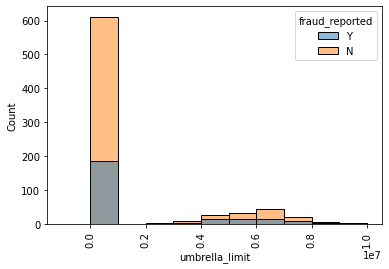

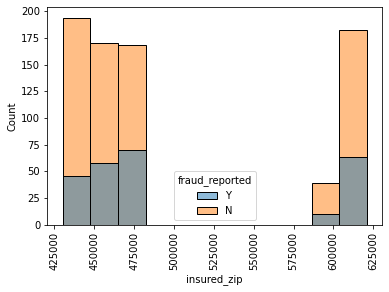

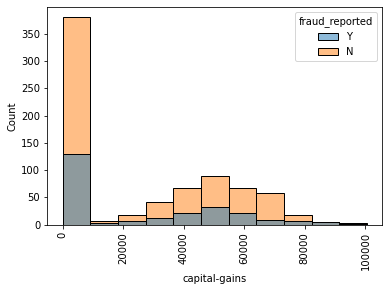

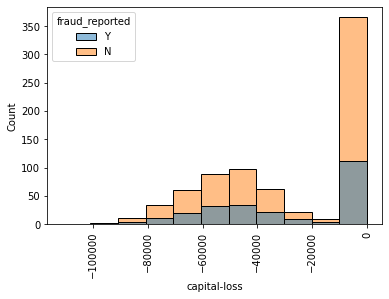

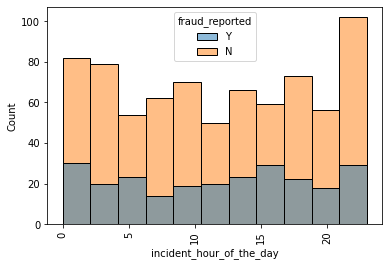

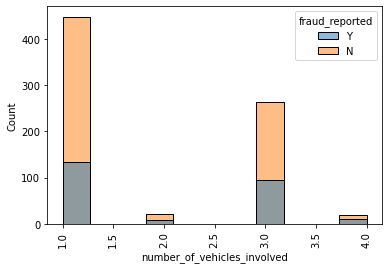

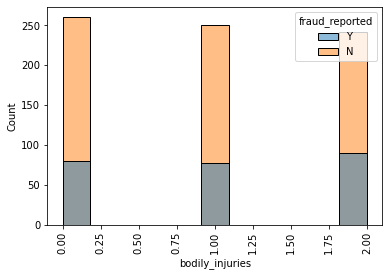

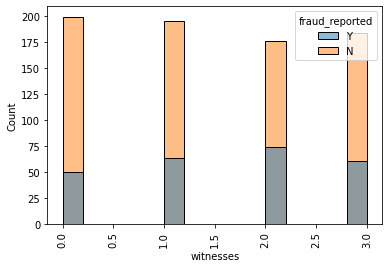

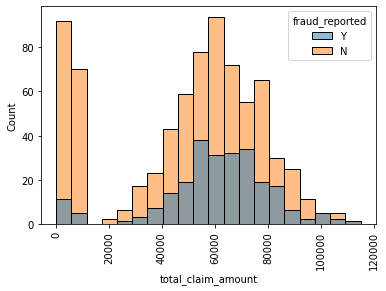

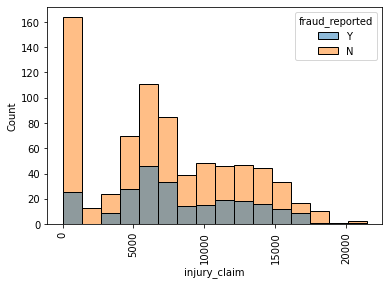

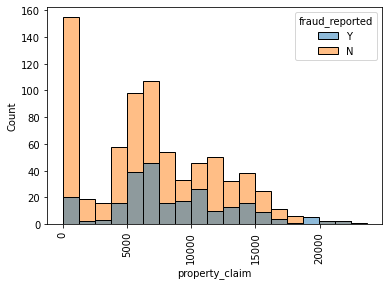

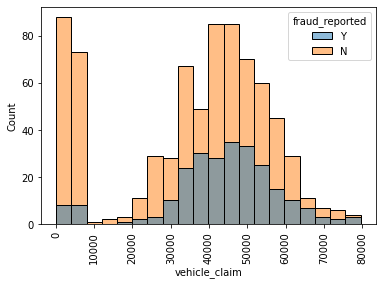

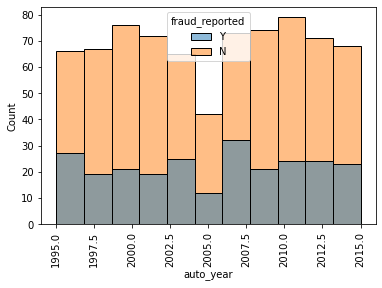

In [8]:
#Plotting Count plot for continuous data
col=['months_as_customer','age','policy_number','policy_deductable','policy_annual_premium','umbrella_limit','insured_zip','capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','total_claim_amount','injury_claim','property_claim','vehicle_claim','auto_year']
for i in col:
    a=sns.histplot(x=df[i],hue=df['fraud_reported'],data=df)
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.show()

In [14]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [15]:
df['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [16]:
df['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [32]:
df['collision_type']=df['collision_type'].replace('?','Rear Collision')
df['property_damage']=df['property_damage'].replace('?','NO')
df['police_report_available']=df['police_report_available'].replace('?','NO')



In [33]:
print(df['collision_type'].value_counts())
print(df['property_damage'].value_counts())
print(df['police_report_available'].value_counts())

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64
NO     698
YES    302
Name: property_damage, dtype: int64
NO     686
YES    314
Name: police_report_available, dtype: int64


## Treating Dates

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, '1990'),
  Text(1, 0, '1991'),
  Text(2, 0, '1992'),
  Text(3, 0, '1993'),
  Text(4, 0, '1994'),
  Text(5, 0, '1995'),
  Text(6, 0, '1996'),
  Text(7, 0, '1997'),
  Text(8, 0, '1998'),
  Text(9, 0, '1999'),
  Text(10, 0, '2000'),
  Text(11, 0, '2001'),
  Text(12, 0, '2002'),
  Text(13, 0, '2003'),
  Text(14, 0, '2004'),
  Text(15, 0, '2005'),
  Text(16, 0, '2006'),
  Text(17, 0, '2007'),
  Text(18, 0, '2008'),
  Text(19, 0, '2009'),
  Text(20, 0, '2010'),
  Text(21, 0, '2011'),
  Text(22, 0, '2012'),
  Text(23, 0, '2013'),
  Text(24, 0, '2014'),
  Text(25, 0, '2015')])

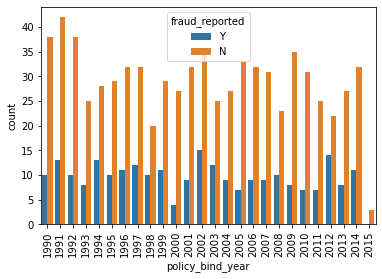

In [34]:
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['policy_bind_year'] = df['policy_bind_date'].dt.year
df=df.drop(['policy_bind_date'],axis=1)
sns.countplot(x='policy_bind_year',hue=df['fraud_reported'],data=df)
plt.xticks(rotation=90)

## Encoding

In [35]:
category=['policy_bind_year','policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship',
         'incident_date','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','incident_location','property_damage',
         'police_report_available','auto_make','auto_model']
oe=OrdinalEncoder()
for i in category:
    df1=oe.fit_transform(df[[i]])
    df[i]=df1
df

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_year
0,328,48,521585,2.0,1.0,1000,1406.91,0,466132,1.0,...,1.0,71610,6510,13020,52080,10.0,1.0,2004,Y,24.0
1,228,42,342868,1.0,1.0,2000,1197.22,5000000,468176,1.0,...,0.0,5070,780,780,3510,8.0,12.0,2007,Y,16.0
2,134,29,687698,2.0,0.0,2000,1413.14,5000000,430632,0.0,...,0.0,34650,7700,3850,23100,4.0,30.0,2007,N,10.0
3,256,41,227811,0.0,1.0,2000,1415.74,6000000,608117,0.0,...,0.0,63400,6340,6340,50720,3.0,34.0,2014,Y,0.0
4,228,44,367455,0.0,2.0,1000,1583.91,6000000,610706,1.0,...,0.0,6500,1300,650,4550,0.0,31.0,2009,N,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,2.0,2.0,1000,1310.80,0,431289,0.0,...,0.0,87200,17440,8720,61040,6.0,6.0,2006,N,1.0
996,285,41,186934,0.0,0.0,1000,1436.79,0,608177,0.0,...,0.0,108480,18080,18080,72320,13.0,28.0,2015,N,24.0
997,130,34,918516,2.0,1.0,500,1383.49,3000000,442797,0.0,...,1.0,67500,7500,7500,52500,11.0,19.0,1996,N,13.0
998,458,62,533940,0.0,2.0,2000,1356.92,5000000,441714,1.0,...,1.0,46980,5220,5220,36540,1.0,5.0,1998,N,21.0


## Label Encoding

In [36]:
le=LabelEncoder()
df1=le.fit_transform(df['fraud_reported'])
df['fraud_reported']=df1
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_year
0,328,48,521585,2.0,1.0,1000,1406.91,0,466132,1.0,...,1.0,71610,6510,13020,52080,10.0,1.0,2004,1,24.0
1,228,42,342868,1.0,1.0,2000,1197.22,5000000,468176,1.0,...,0.0,5070,780,780,3510,8.0,12.0,2007,1,16.0
2,134,29,687698,2.0,0.0,2000,1413.14,5000000,430632,0.0,...,0.0,34650,7700,3850,23100,4.0,30.0,2007,0,10.0
3,256,41,227811,0.0,1.0,2000,1415.74,6000000,608117,0.0,...,0.0,63400,6340,6340,50720,3.0,34.0,2014,1,0.0
4,228,44,367455,0.0,2.0,1000,1583.91,6000000,610706,1.0,...,0.0,6500,1300,650,4550,0.0,31.0,2009,0,24.0


## Describing the data

In [37]:
df.describe()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_year
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,0.463000,...,0.314000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000,11.604000
std,115.113174,9.140287,257063.005276,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,...,0.464349,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483,7.360391
min,0.000000,19.000000,100804.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,...,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000,0.000000
25%,115.750000,32.000000,335980.250000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,...,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000,5.000000
50%,199.500000,38.000000,533135.000000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,...,0.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000,12.000000
75%,276.250000,44.000000,759099.750000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,...,1.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000,18.000000
max,479.000000,64.000000,999435.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,...,1.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000,25.000000


## Correlation between features

In [38]:
df.corr().abs()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_year
months_as_customer,1.000000,0.922098,0.057555,0.000328,0.026819,0.026807,0.005018,0.015498,0.017895,0.060925,...,0.022146,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,0.000292,0.020544,0.048276
age,0.922098,1.000000,0.059413,0.014533,0.015185,0.029188,0.014404,0.018126,0.025604,0.073337,...,0.020441,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143,0.037444
policy_number,0.057555,0.059413,1.000000,0.072815,0.038917,0.006738,0.022566,0.008968,0.007083,0.004564,...,0.031190,0.018009,0.008762,0.010678,0.020184,0.023860,0.065240,0.000183,0.029443,0.040099
policy_state,0.000328,0.014533,0.072815,1.000000,0.001027,0.010033,0.012455,0.029580,0.008777,0.020481,...,0.069017,0.006002,0.046290,0.008406,0.001425,0.017124,0.025253,0.002114,0.029432,0.007276
policy_csl,0.026819,0.015185,0.038917,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,0.010757,...,0.001645,0.055758,0.078818,0.042216,0.046791,0.004701,0.047885,0.033082,0.037190,0.016466
policy_deductable,0.026807,0.029188,0.006738,0.010033,0.003384,1.000000,0.003245,0.010870,0.004545,0.009733,...,0.038036,0.022839,0.039107,0.064792,0.005269,0.035379,0.003268,0.026105,0.014817,0.049598
policy_annual_premium,0.005018,0.014404,0.022566,0.012455,0.023978,0.003245,1.000000,0.006247,0.032354,0.038853,...,0.021998,0.009094,0.017633,0.011654,0.020246,0.000045,0.031849,0.049226,0.014480,0.001249
umbrella_limit,0.015498,0.018126,0.008968,0.029580,0.021636,0.010870,0.006247,1.000000,0.019671,0.010688,...,0.044771,0.040344,0.045412,0.023790,0.038584,0.004443,0.040256,0.009893,0.058622,0.048008
insured_zip,0.017895,0.025604,0.007083,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,0.036942,...,0.009841,0.033873,0.017495,0.006841,0.041083,0.020892,0.023637,0.032736,0.019368,0.001100
insured_sex,0.060925,0.073337,0.004564,0.020481,0.010757,0.009733,0.038853,0.010688,0.036942,1.000000,...,0.006992,0.023727,0.000924,0.014868,0.029609,0.026457,0.018421,0.028247,0.030873,0.032891


<AxesSubplot:>

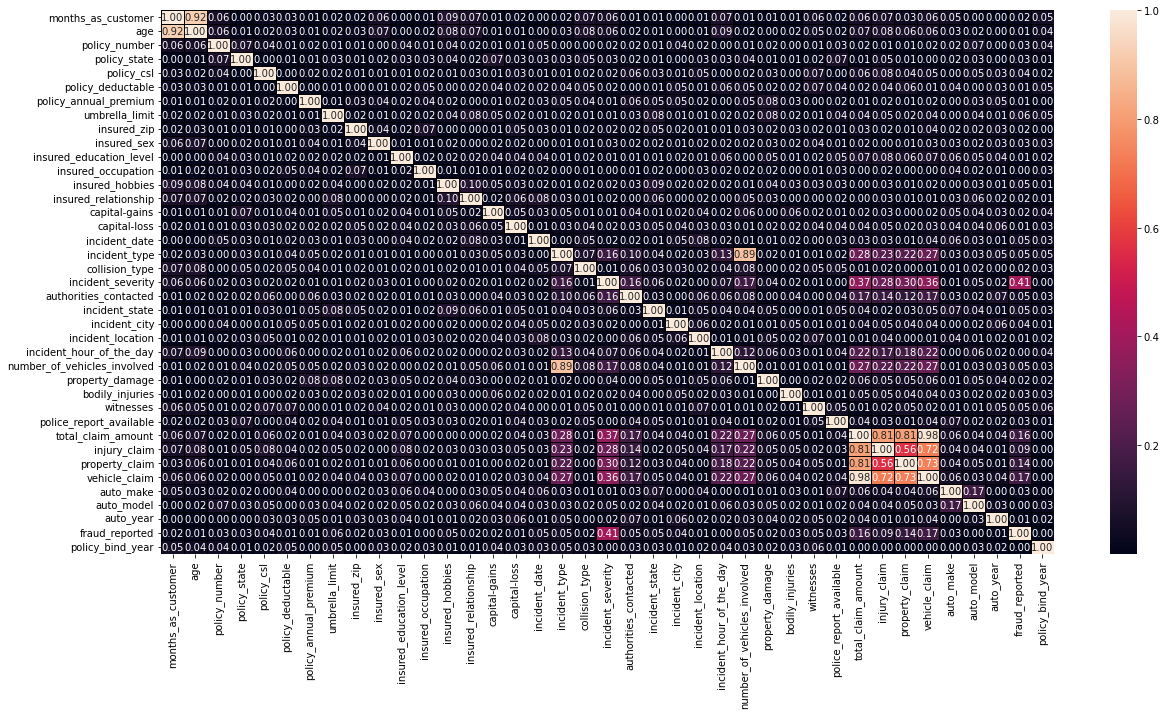

In [39]:
# Plotting heat map for better analysis
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')

## VIF

In [40]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif['features']=df.columns
vif

C:\Users\user\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,vif,features
0,28.369108,months_as_customer
1,131.455091,age
2,5.699106,policy_number
3,2.589688,policy_state
4,2.473189,policy_csl
5,4.631392,policy_deductable
6,28.494415,policy_annual_premium
7,1.277379,umbrella_limit
8,51.185864,insured_zip
9,1.912805,insured_sex


We are sure of multicollinearity now.

## Checking outliers

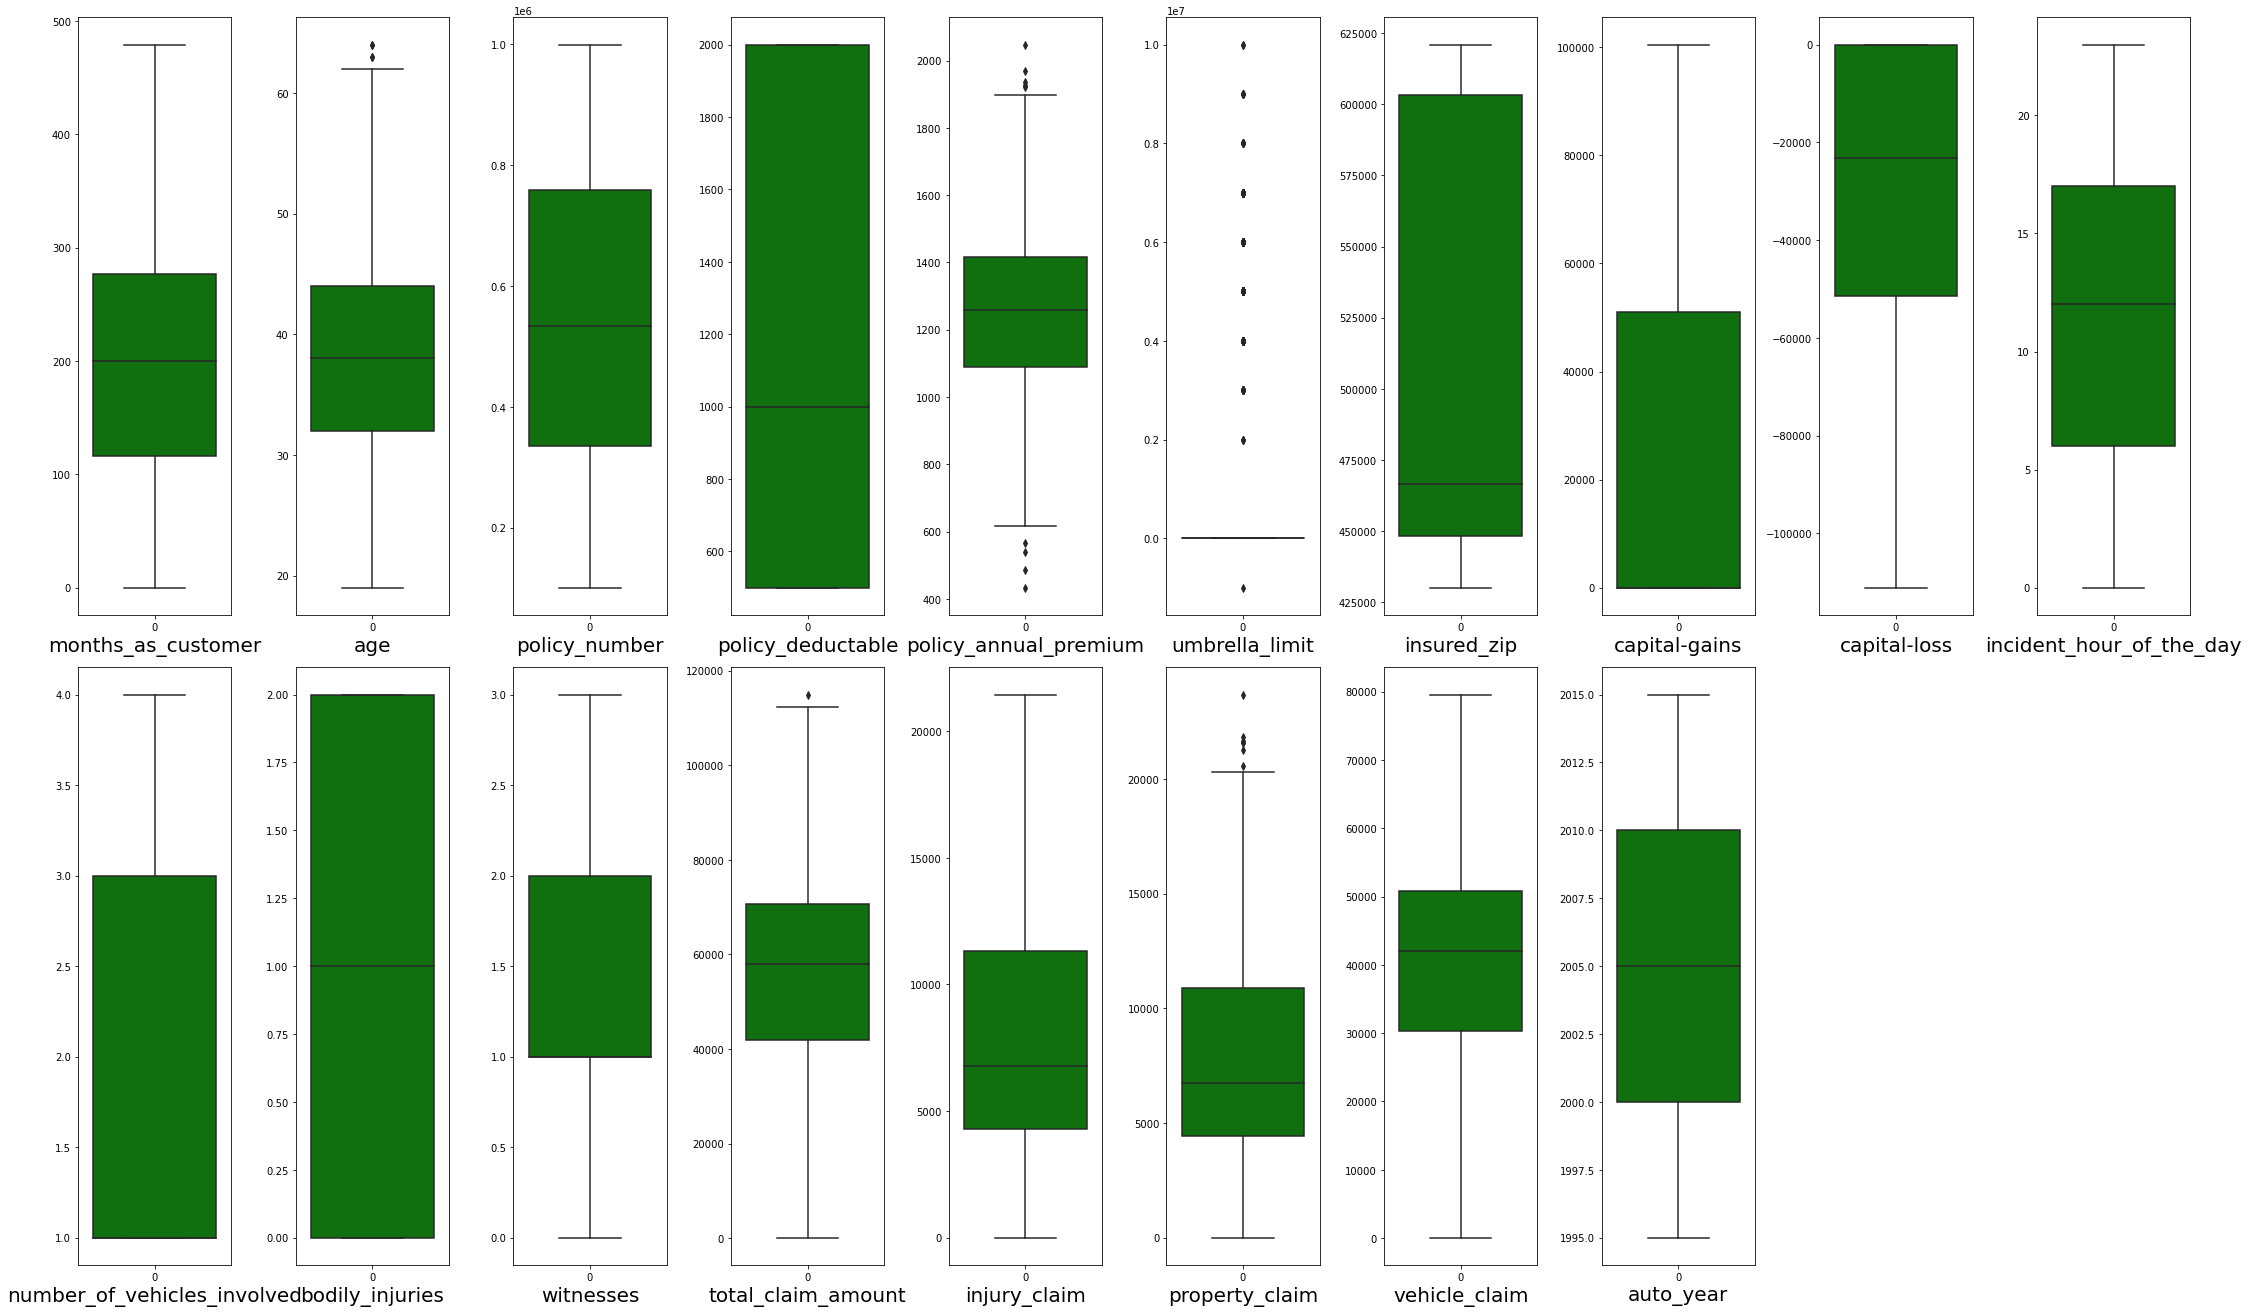

In [41]:
col=['months_as_customer','age','policy_number','policy_deductable','policy_annual_premium','umbrella_limit','insured_zip','capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','total_claim_amount','injury_claim','property_claim','vehicle_claim','auto_year']
plt.figure(figsize=(30,90))
for i in range(len(col)):
    plt.subplot(10,10,i+1)
    sns.boxplot(data=df[col[i]],color='green',orient='v')
    plt.xlabel(col[i],fontsize=20)
    plt.tight_layout()

## Checking skewness

In [42]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584


We would get sure of skewness using dist plot.

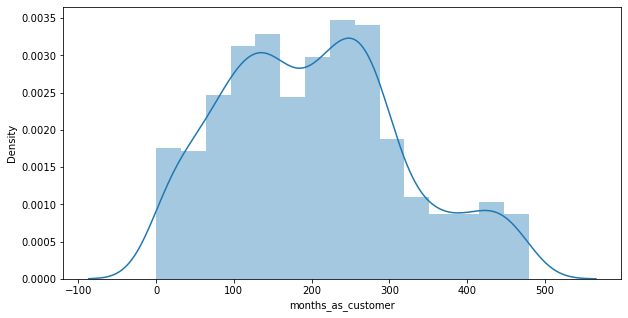

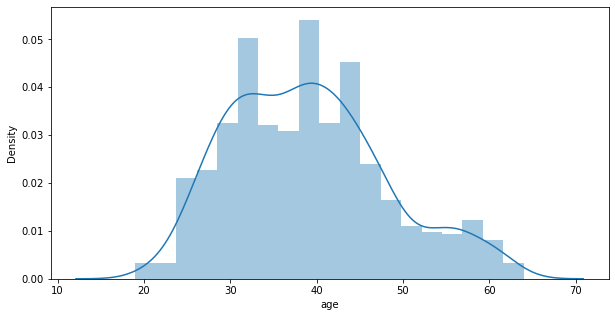

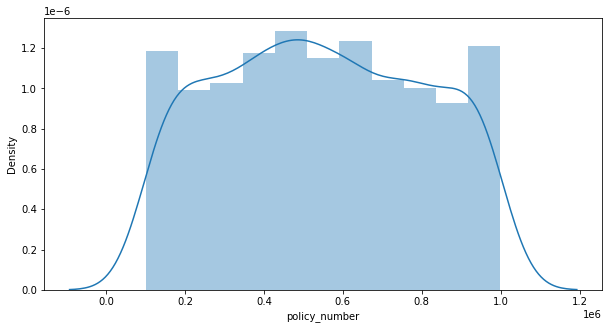

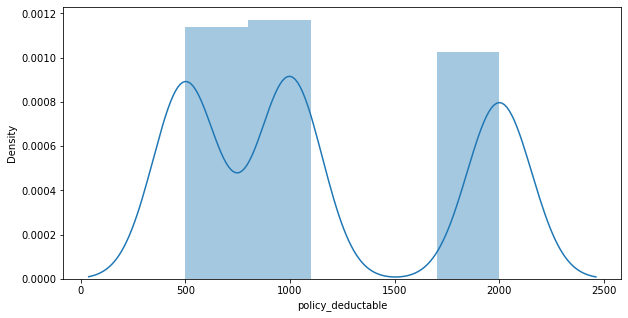

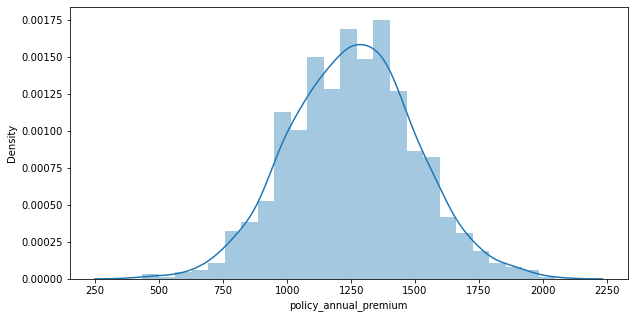

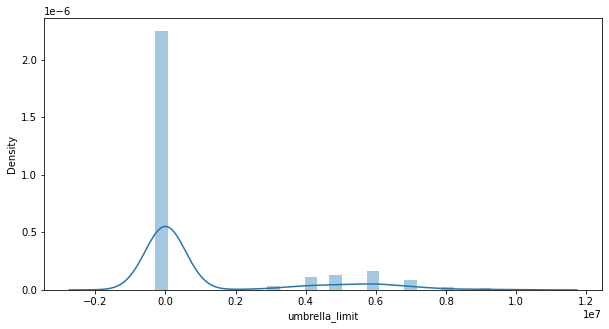

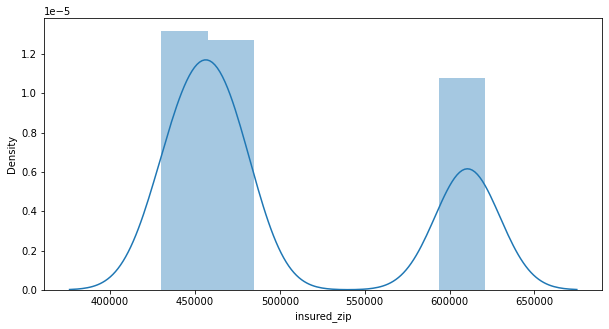

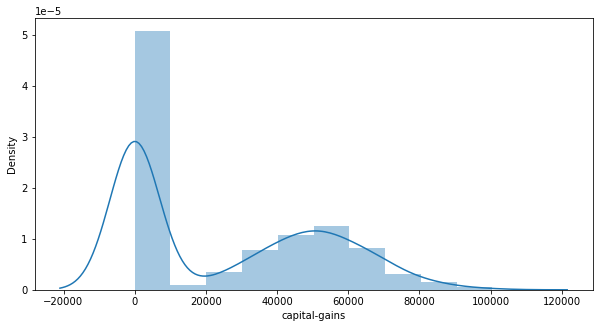

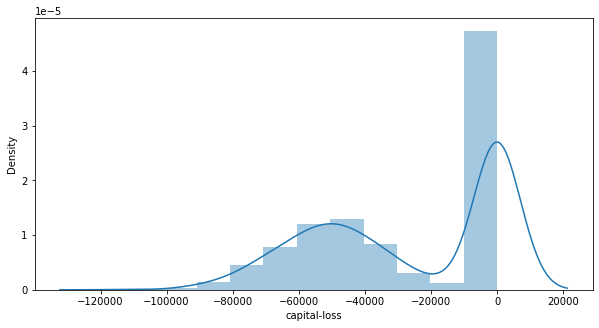

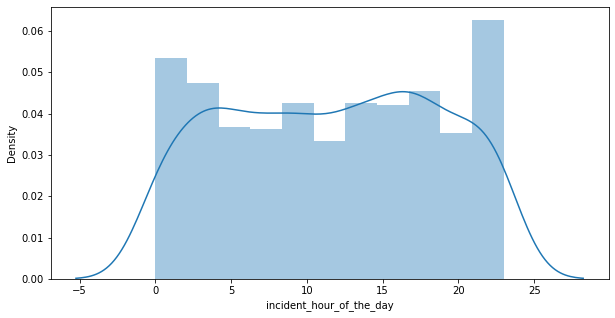

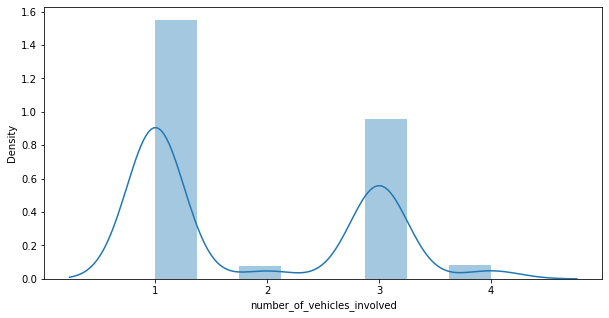

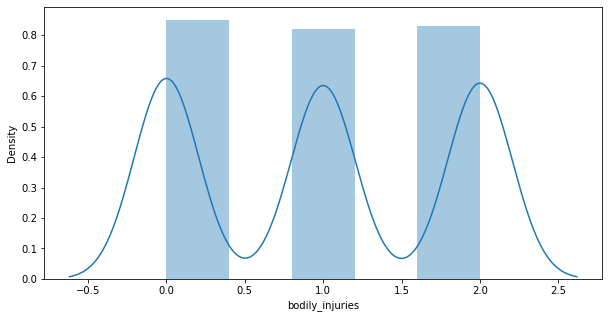

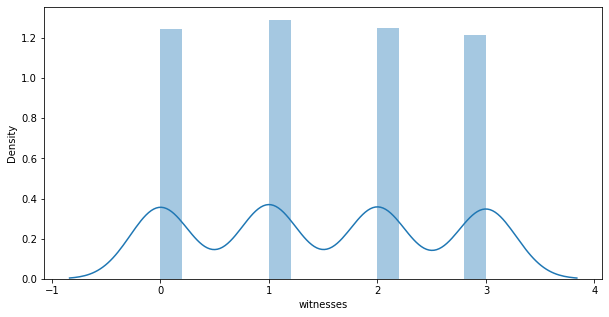

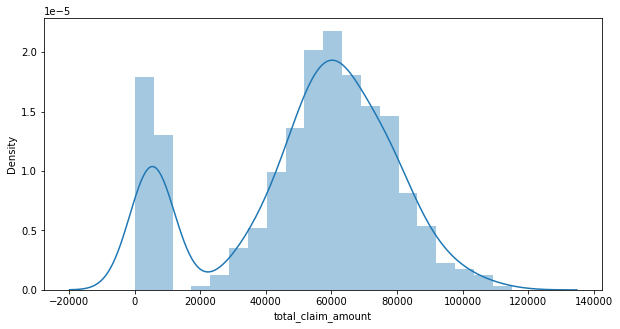

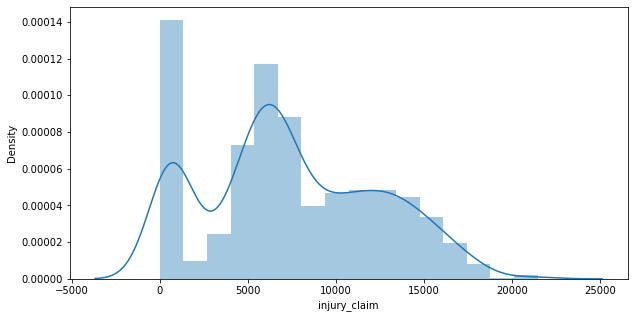

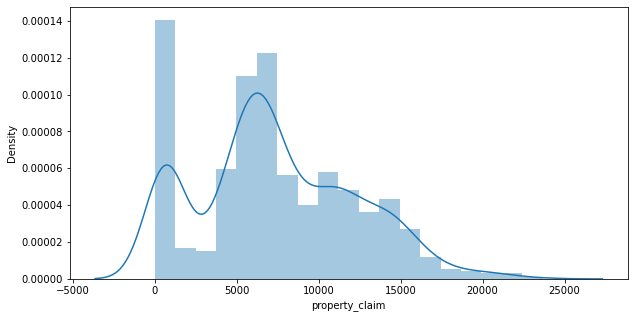

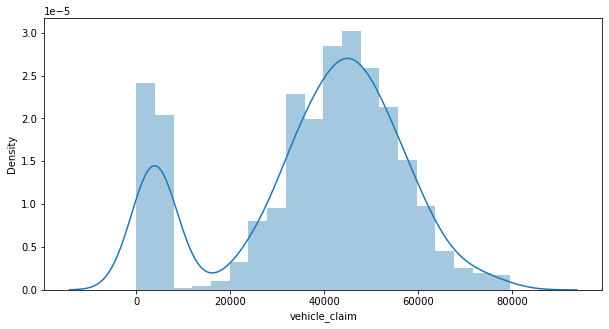

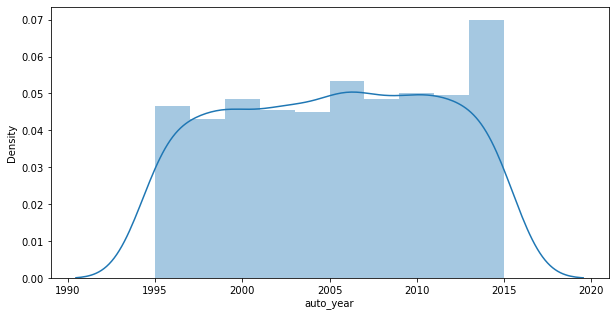

In [43]:
#Plotting dist plot
col=['months_as_customer','age','policy_number','policy_deductable','policy_annual_premium','umbrella_limit','insured_zip','capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','total_claim_amount','injury_claim','property_claim','vehicle_claim','auto_year']
import warnings
warnings.filterwarnings('ignore')
for i in range(len(col)):
    plt.figure(figsize=(10,5))
    sns.distplot(df[col[i]])
    plt.xlabel(col[i],fontsize=10)

Our observation was correct.

## Treating multicollinearity

Lets drop infinity vif score feature injury_claim as it is just 9% related with fraud_reported.

In [44]:
df=df.drop(['injury_claim'],axis=1)

In [45]:
# Checking vif again
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif['features']=df.columns
vif

,vif,features
0,28.369108,months_as_customer
1,131.455091,age
2,5.699106,policy_number
3,2.589688,policy_state
4,2.473189,policy_csl
5,4.631392,policy_deductable
6,28.494415,policy_annual_premium
7,1.277379,umbrella_limit
8,51.185864,insured_zip
9,1.912805,insured_sex


Lets drop infinity vif score feature vehicle_claim.

In [46]:
df=df.drop(['vehicle_claim'],axis=1)

In [47]:
# Checking vif again
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif['features']=df.columns
vif

,vif,features
0,28.344138,months_as_customer
1,131.258304,age
2,5.697681,policy_number
3,2.580431,policy_state
4,2.463263,policy_csl
5,4.612147,policy_deductable
6,28.393882,policy_annual_premium
7,1.276850,umbrella_limit
8,51.117912,insured_zip
9,1.909628,insured_sex


In [48]:
df=df.drop(['auto_year'],axis=1)

In [49]:
# Checking vif again
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif['features']=df.columns
vif

,vif,features
0,24.641942,months_as_customer
1,106.826765,age
2,5.640432,policy_number
3,2.556280,policy_state
4,2.457372,policy_csl
5,4.533271,policy_deductable
6,25.944692,policy_annual_premium
7,1.276697,umbrella_limit
8,40.326167,insured_zip
9,1.908369,insured_sex


In [50]:
df=df.drop(['age'],axis=1)

In [51]:
# Checking vif again
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif['features']=df.columns
vif

,vif,features
0,4.309491,months_as_customer
1,5.617778,policy_number
2,2.556055,policy_state
3,2.451428,policy_csl
4,4.513193,policy_deductable
5,25.076547,policy_annual_premium
6,1.276607,umbrella_limit
7,37.169722,insured_zip
8,1.900720,insured_sex
9,3.423515,insured_education_level


In [52]:
df=df.drop(['insured_zip'],axis=1)

In [53]:
# Checking vif again
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif['features']=df.columns
vif

,vif,features
0,4.276865,months_as_customer
1,5.590078,policy_number
2,2.545392,policy_state
3,2.444930,policy_csl
4,4.483942,policy_deductable
5,23.238221,policy_annual_premium
6,1.275263,umbrella_limit
7,1.899794,insured_sex
8,3.401826,insured_education_level
9,3.697791,insured_occupation


In [54]:
df=df.drop(['policy_annual_premium'],axis=1)

In [55]:
# Checking vif again
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif['features']=df.columns
vif

,vif,features
0,4.259550,months_as_customer
1,5.539791,policy_number
2,2.536316,policy_state
3,2.432869,policy_csl
4,4.448789,policy_deductable
5,1.274917,umbrella_limit
6,1.893051,insured_sex
7,3.396203,insured_education_level
8,3.641813,insured_occupation
9,4.034361,insured_hobbies


## Treating outliers

In [57]:
#Getting sure of outliers using z score
x=df.drop(['policy_bind_year','policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship',
         'incident_date','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','incident_location','property_damage',
         'police_report_available','auto_make','auto_model','fraud_reported'],axis=1)
z=np.abs(zscore(x))
i=np.where(z>3)
print("Outliers index-\n",set(i[0]))
print("\n\nNumber of rows to be eliminated-\n",len(set(i[0])))

Outliers index-
 {503, 262, 807, 458, 875, 922, 430, 975, 48, 657, 115, 500, 119, 88, 314, 700, 31}


Number of rows to be eliminated-
 17


In [58]:
df.shape

(1000, 33)

In [59]:
#Finding data loss
no_row_dropped=419
loss=(1000-17)/1000
loss=(1-loss)*100
print("data loss-",loss)

data loss- 1.7000000000000015


We could bear with 2% data loss, so lets drop these rows.

In [60]:
#removing rows with outliers
df=df.drop(df.index[i[0]])
df

,months_as_customer,policy_number,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,property_claim,auto_make,auto_model,fraud_reported,policy_bind_year
0,328,521585,2.0,1.0,1000,0,1.0,4.0,2.0,17.0,...,1.0,1,2,1.0,71610,13020,10.0,1.0,1,24.0
1,228,342868,1.0,1.0,2000,5000000,1.0,4.0,6.0,15.0,...,0.0,0,0,0.0,5070,780,8.0,12.0,1,16.0
2,134,687698,2.0,0.0,2000,5000000,0.0,6.0,11.0,2.0,...,0.0,2,3,0.0,34650,3850,4.0,30.0,0,10.0
3,256,227811,0.0,1.0,2000,6000000,0.0,6.0,1.0,2.0,...,0.0,1,2,0.0,63400,6340,3.0,34.0,1,0.0
4,228,367455,0.0,2.0,1000,6000000,1.0,0.0,11.0,2.0,...,0.0,0,1,0.0,6500,650,0.0,31.0,0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,941851,2.0,2.0,1000,0,0.0,5.0,2.0,13.0,...,1.0,0,1,0.0,87200,8720,6.0,6.0,0,1.0
996,285,186934,0.0,0.0,1000,0,0.0,6.0,9.0,17.0,...,1.0,2,3,0.0,108480,18080,13.0,28.0,0,24.0
997,130,918516,2.0,1.0,500,3000000,0.0,5.0,1.0,3.0,...,0.0,2,3,1.0,67500,7500,11.0,19.0,0,13.0
998,458,533940,0.0,2.0,2000,5000000,1.0,0.0,5.0,0.0,...,0.0,0,1,1.0,46980,5220,1.0,5.0,0,21.0


In [62]:
#checking skewness again
df.skew()

months_as_customer             0.366978
policy_number                  0.039782
policy_state                  -0.034234
policy_csl                     0.096017
policy_deductable              0.479334
umbrella_limit                 1.806345
insured_sex                    0.140949
insured_education_level        0.004804
insured_occupation            -0.052521
insured_hobbies               -0.061328
insured_relationship           0.078645
capital-gains                  0.469129
capital-loss                  -0.373733
incident_date                  0.003394
incident_type                  0.091084
collision_type                -0.031080
incident_severity              0.280436
authorities_contacted         -0.113368
incident_state                -0.152489
incident_city                  0.048398
incident_location             -0.002770
incident_hour_of_the_day      -0.034313
number_of_vehicles_involved    0.510353
property_damage                0.857869
bodily_injuries                0.009371


WE need to treat it as skewness still exists.

## Checking data is balanced or not

In [61]:
df['fraud_reported'].value_counts()

0    742
1    241
Name: fraud_reported, dtype: int64

Observation: data is imbalanced so we need to balance it now.

## Data Balancing

In [63]:
from sklearn.utils import resample

NoFraud=df[df.fraud_reported==0]
YesFraud=df[df.fraud_reported==1]
Yes_upsampled=resample(YesFraud,replace=True,n_samples=len(NoFraud),random_state=27)
df_up=pd.concat([NoFraud,Yes_upsampled])
df_up['fraud_reported'].value_counts()

0    742
1    742
Name: fraud_reported, dtype: int64

## Treating skewness

In [64]:
x=df_up.drop(['fraud_reported'],axis=1)
y=df_up['fraud_reported']

In [65]:
#using yeo-johnson transformation
x=power_transform(x,method='yeo-johnson')
x

array([[-0.48746144,  0.63779998,  1.13162865, ..., -0.53166092,
         0.96144648, -0.09310465],
       [ 0.31300727, -0.5793876 , -1.2810474 , ..., -1.84493784,
         1.0384304 ,  1.51516769],
       [-0.45932566, -0.38368243,  0.02948789, ...,  0.67111491,
         0.88384345, -0.09310465],
       ...,
       [-1.71078566, -1.19294672, -1.2810474 , ...,  0.67111491,
         0.88384345,  1.51516769],
       [-0.28590575, -0.5061968 ,  0.02948789, ..., -0.01928601,
        -0.76308865, -1.18031779],
       [-1.67905921, -1.21156526, -1.2810474 , ..., -1.44965978,
        -1.29838836, -0.22930143]])

## Standardization 

In [66]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[-0.48746144,  0.63779998,  1.13162865, ..., -0.53166092,
         0.96144648, -0.09310465],
       [ 0.31300727, -0.5793876 , -1.2810474 , ..., -1.84493784,
         1.0384304 ,  1.51516769],
       [-0.45932566, -0.38368243,  0.02948789, ...,  0.67111491,
         0.88384345, -0.09310465],
       ...,
       [-1.71078566, -1.19294672, -1.2810474 , ...,  0.67111491,
         0.88384345,  1.51516769],
       [-0.28590575, -0.5061968 ,  0.02948789, ..., -0.01928601,
        -0.76308865, -1.18031779],
       [-1.67905921, -1.21156526, -1.2810474 , ..., -1.44965978,
        -1.29838836, -0.22930143]])

## Train test split

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
max_ac=0
randomState=0
lr=LogisticRegression()
for i in range(500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("\n\nAt random state:",i)
        print("\nTrain Accuracy- ",round(accuracy_score(y_train,pred_train)*100,1))
        print("\nTest Accuracy- ",round(accuracy_score(y_test,pred_test)*100,1))
        if round(accuracy_score(y_test,pred_test)*100,1)>max_ac:
            randomState=i
            max_ac=round(accuracy_score(y_test,pred_test)*100,1)
print("\n\n Best accuracy at random state-",randomState)



At random state: 0

Train Accuracy-  74.4

Test Accuracy-  74.4


At random state: 26

Train Accuracy-  75.1

Test Accuracy-  75.1


At random state: 98

Train Accuracy-  75.1

Test Accuracy-  75.1


At random state: 129

Train Accuracy-  74.4

Test Accuracy-  74.4


At random state: 318

Train Accuracy-  74.7

Test Accuracy-  74.7


At random state: 387

Train Accuracy-  75.1

Test Accuracy-  75.1


At random state: 431

Train Accuracy-  74.7

Test Accuracy-  74.7


At random state: 494

Train Accuracy-  74.4

Test Accuracy-  74.4


 Best accuracy at random state- 26


## Logistic Regression

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=26,test_size=0.20)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
train_accuracy=round(accuracy_score(y_train,pred_train)*100,1)
test_accuracy=round(accuracy_score(y_test,pred_test)*100,1)
print("\ntrain accuracy-",train_accuracy)
print("\ntest accuracy-",test_accuracy)


train accuracy- 75.1

test accuracy- 75.1


## Cross Validation Score

In [69]:
for i in range(4,20):
    cv_score=cross_val_score(lr,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",test_accuracy)



At cv- 4

 cross validation score is- 74.12398921832884

 Accuracy score is- 75.1


At cv- 5

 cross validation score is- 74.39462189462189

 Accuracy score is- 75.1


At cv- 6

 cross validation score is- 74.06050019589917

 Accuracy score is- 75.1


At cv- 7

 cross validation score is- 74.32614555256065

 Accuracy score is- 75.1


At cv- 8

 cross validation score is- 73.99266201685558

 Accuracy score is- 75.1


At cv- 9

 cross validation score is- 74.05682844707235

 Accuracy score is- 75.1


At cv- 10

 cross validation score is- 73.86042082350806

 Accuracy score is- 75.1


At cv- 11

 cross validation score is- 74.12382531785518

 Accuracy score is- 75.1


At cv- 12

 cross validation score is- 73.85807325815193

 Accuracy score is- 75.1


At cv- 13

 cross validation score is- 73.99518864049756

 Accuracy score is- 75.1


At cv- 14

 cross validation score is- 74.19137466307276

 Accuracy score is- 75.1


At cv- 15

 cross validation score is- 73.85143956572527

 Accuracy s

So we are getting the least difference between cross_val_score and accuracy score at cv=16

In [71]:
cv_score_best=cross_val_score(lr,x,y,cv=16).mean()*100
print("cross validation score is-",cv_score_best)
print("accuracy score for linear regression model is-",test_accuracy)

cross validation score is- 74.33233987844787
accuracy score for linear regression model is- 75.1


## Confusion Matrix

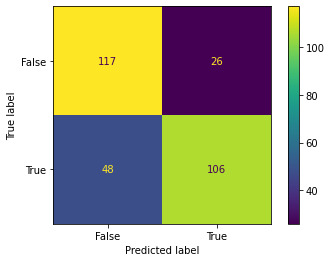

In [72]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_test)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

## AUC-ROC Curve

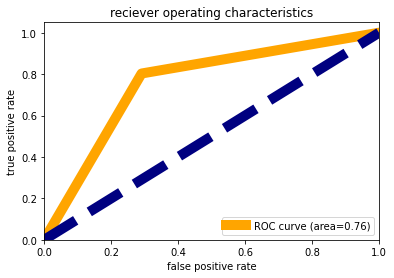

In [73]:
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label="ROC curve (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("reciever operating characteristics")
plt.legend(loc="lower right")
plt.show()

## Classification Report

In [76]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.71      0.82      0.76       143
           1       0.80      0.69      0.74       154

    accuracy                           0.75       297
   macro avg       0.76      0.75      0.75       297
weighted avg       0.76      0.75      0.75       297



## Decision Tree Classifier

In [77]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred_train=dt.predict(x_train)
dt_pred_test=dt.predict(x_test)
dt_acc_train=round(accuracy_score(y_train,dt_pred_train)*100,1)
dt_acc_test=round(accuracy_score(y_test,dt_pred_test)*100,1)
print("acc train",dt_acc_train)
print("acc test",dt_acc_test)

acc train 100.0
acc test 93.3


## Cross Validation Score

In [78]:
for i in range(4,15):
    cv_score=cross_val_score(dt,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",dt_acc_test)



At cv- 4

 cross validation score is- 89.8921832884097

 Accuracy score is- 93.3


At cv- 5

 cross validation score is- 89.8923923923924

 Accuracy score is- 93.3


At cv- 6

 cross validation score is- 90.43141352139655

 Accuracy score is- 93.3


At cv- 7

 cross validation score is- 90.4312668463612

 Accuracy score is- 93.3


At cv- 8

 cross validation score is- 91.3081226387678

 Accuracy score is- 93.3


At cv- 9

 cross validation score is- 91.3755440584709

 Accuracy score is- 93.3


At cv- 10

 cross validation score is- 91.30872483221478

 Accuracy score is- 93.3


At cv- 11

 cross validation score is- 90.56786773204686

 Accuracy score is- 93.3


At cv- 12

 cross validation score is- 91.37817991083138

 Accuracy score is- 93.3


At cv- 13

 cross validation score is- 91.10191867628939

 Accuracy score is- 93.3


At cv- 14

 cross validation score is- 90.97035040431265

 Accuracy score is- 93.3


So we are getting the least difference between cross_val_score and accuracy score at cv=12

In [80]:
cv_score_best_dt=cross_val_score(dt,x,y,cv=12).mean()*100
print("cross validation score is-",cv_score_best_dt)
print("accuracy score for decision tree classifier model is-",dt_acc_test)

cross validation score is- 91.10990908296182
accuracy score for decision tree classifier model is- 93.3


## Confusion Matrix

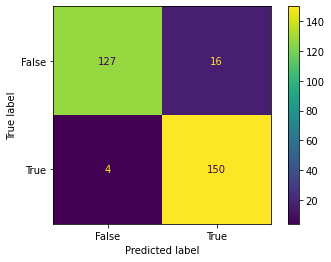

In [81]:
confusion_matrix = metrics.confusion_matrix(y_test, dt_pred_test)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

## AUC-ROC Curve

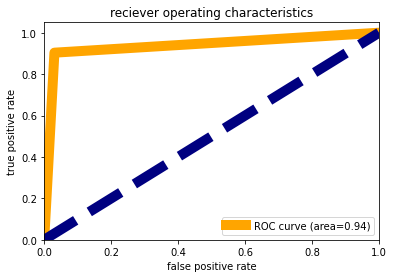

In [82]:
fpr,tpr,thresholds=roc_curve(dt_pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label="ROC curve (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("reciever operating characteristics")
plt.legend(loc="lower right")
plt.show()

## Classification Report

In [83]:
print(classification_report(y_test, dt_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       143
           1       0.90      0.97      0.94       154

    accuracy                           0.93       297
   macro avg       0.94      0.93      0.93       297
weighted avg       0.94      0.93      0.93       297



## Knn Classifier

In [84]:
from sklearn.neighbors import KNeighborsClassifier
max_ac=0
randomState=0
knn=KNeighborsClassifier()
for i in range(40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.25)
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    
    print("\n\nAt random state:",i)
    print("\nTrain Accuracy- ",round(accuracy_score(y_train,pred_train)*100,1))
    print("\nTest Accuracy- ",round(accuracy_score(y_test,pred_test)*100,1))
        
print("\n\n Best accuracy at random state-",randomState)



At random state: 0

Train Accuracy-  82.1

Test Accuracy-  69.8


At random state: 1

Train Accuracy-  79.6

Test Accuracy-  74.7


At random state: 2

Train Accuracy-  81.3

Test Accuracy-  74.4


At random state: 3

Train Accuracy-  81.9

Test Accuracy-  69.8


At random state: 4

Train Accuracy-  82.2

Test Accuracy-  67.9


At random state: 5

Train Accuracy-  81.9

Test Accuracy-  70.6


At random state: 6

Train Accuracy-  82.4

Test Accuracy-  68.7


At random state: 7

Train Accuracy-  82.5

Test Accuracy-  73.3


At random state: 8

Train Accuracy-  82.3

Test Accuracy-  73.6


At random state: 9

Train Accuracy-  82.6

Test Accuracy-  74.4


At random state: 10

Train Accuracy-  83.0

Test Accuracy-  69.0


At random state: 11

Train Accuracy-  81.9

Test Accuracy-  70.4


At random state: 12

Train Accuracy-  82.8

Test Accuracy-  72.8


At random state: 13

Train Accuracy-  81.1

Test Accuracy-  70.1


At random state: 14

Train Accuracy-  83.0

Test Accuracy-  69.8


At 

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.20)
knn.fit(x_train,y_train)
pred_train=knn.predict(x_train)
pred_test=knn.predict(x_test)
knn_train_acc=round(accuracy_score(y_train,pred_train)*100,1)
knn_test_acc=round(accuracy_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",knn_train_acc)
print("\nTest Accuracy- ",knn_test_acc)


Train Accuracy-  80.7

Test Accuracy-  75.4


## Cross Validation Score

In [86]:
for i in range(4,15):
    cv_score=cross_val_score(knn,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",knn_test_acc)



At cv- 4

 cross validation score is- 70.95687331536388

 Accuracy score is- 75.4


At cv- 5

 cross validation score is- 72.64309764309765

 Accuracy score is- 75.4


At cv- 6

 cross validation score is- 72.23836576553046

 Accuracy score is- 75.4


At cv- 7

 cross validation score is- 72.97843665768194

 Accuracy score is- 75.4


At cv- 8

 cross validation score is- 73.31734960767218

 Accuracy score is- 75.4


At cv- 9

 cross validation score is- 73.45158906134516

 Accuracy score is- 75.4


At cv- 10

 cross validation score is- 73.9892073281335

 Accuracy score is- 75.4


At cv- 11

 cross validation score is- 74.73038846173175

 Accuracy score is- 75.4


At cv- 12

 cross validation score is- 74.26348457032958

 Accuracy score is- 75.4


At cv- 13

 cross validation score is- 74.39593968198088

 Accuracy score is- 75.4


At cv- 14

 cross validation score is- 74.93261455525608

 Accuracy score is- 75.4


So we are getting the least difference between cross_val_score and accuracy score at cv=11

In [87]:
cv_score_best_knn=cross_val_score(knn,x,y,cv=11).mean()*100
print("cross validation score is-",cv_score_best_knn)
print("accuracy score for Knn classifier model is-",knn_test_acc)

cross validation score is- 74.73038846173175
accuracy score for Knn classifier model is- 75.4


## Confusion Matrix

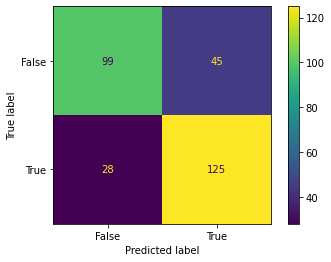

In [88]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_test)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

## AUC-ROC Curve

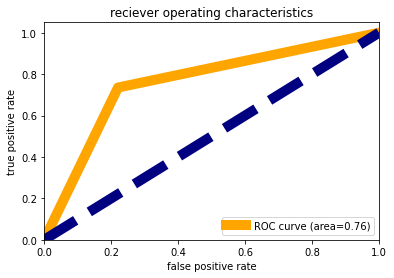

In [89]:
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label="ROC curve (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("reciever operating characteristics")
plt.legend(loc="lower right")
plt.show()

## Classification Report

In [90]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.78      0.69      0.73       144
           1       0.74      0.82      0.77       153

    accuracy                           0.75       297
   macro avg       0.76      0.75      0.75       297
weighted avg       0.76      0.75      0.75       297



## Random Forest Classifier

In [91]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
max_ac=0
randomState=0

for i in range(40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.25)
    rf.fit(x_train,y_train)
    pred_train=rf.predict(x_train)
    pred_test=rf.predict(x_test)
    
    print("\n\nAt random state:",i)
    print("\nTrain Accuracy- ",round(accuracy_score(y_train,pred_train)*100,1))
    print("\nTest Accuracy- ",round(accuracy_score(y_test,pred_test)*100,1))
        
print("\n\n Best accuracy at random state-",randomState)



At random state: 0

Train Accuracy-  100.0

Test Accuracy-  91.6


At random state: 1

Train Accuracy-  100.0

Test Accuracy-  91.9


At random state: 2

Train Accuracy-  100.0

Test Accuracy-  90.3


At random state: 3

Train Accuracy-  100.0

Test Accuracy-  92.5


At random state: 4

Train Accuracy-  100.0

Test Accuracy-  93.5


At random state: 5

Train Accuracy-  100.0

Test Accuracy-  91.1


At random state: 6

Train Accuracy-  100.0

Test Accuracy-  90.3


At random state: 7

Train Accuracy-  100.0

Test Accuracy-  92.2


At random state: 8

Train Accuracy-  100.0

Test Accuracy-  92.5


At random state: 9

Train Accuracy-  100.0

Test Accuracy-  91.1


At random state: 10

Train Accuracy-  100.0

Test Accuracy-  94.1


At random state: 11

Train Accuracy-  100.0

Test Accuracy-  93.0


At random state: 12

Train Accuracy-  100.0

Test Accuracy-  92.5


At random state: 13

Train Accuracy-  100.0

Test Accuracy-  92.7


At random state: 14

Train Accuracy-  100.0

Test Accura

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=0.20)
rf.fit(x_train,y_train)
pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)
rf_train_acc=round(accuracy_score(y_train,pred_train)*100,1)
rf_test_acc=round(accuracy_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",rf_train_acc)
print("\nTest Accuracy- ",rf_test_acc)


Train Accuracy-  100.0

Test Accuracy-  94.3


## Cross Validation Score

In [97]:
for i in range(4,15):
    cv_score=cross_val_score(rf,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",rf_test_acc)



At cv- 4

 cross validation score is- 92.11590296495957

 Accuracy score is- 94.3


At cv- 5

 cross validation score is- 92.38602238602238

 Accuracy score is- 94.3


At cv- 6

 cross validation score is- 92.2505550476688

 Accuracy score is- 94.3


At cv- 7

 cross validation score is- 92.25067385444744

 Accuracy score is- 94.3


At cv- 8

 cross validation score is- 92.92574832897414

 Accuracy score is- 94.3


At cv- 9

 cross validation score is- 93.05986696230597

 Accuracy score is- 94.3


At cv- 10

 cross validation score is- 92.7906765826229

 Accuracy score is- 94.3


At cv- 11

 cross validation score is- 93.32830795517363

 Accuracy score is- 94.3


At cv- 12

 cross validation score is- 92.85995279307632

 Accuracy score is- 94.3


At cv- 13

 cross validation score is- 93.59854485712607

 Accuracy score is- 94.3


At cv- 14

 cross validation score is- 92.18328840970351

 Accuracy score is- 94.3


So we are getting the least difference between cross_val_score and accuracy score at cv=13.

In [99]:
cv_score_best_rf=cross_val_score(rf,x,y,cv=13).mean()*100
print("cross validation score is-",cv_score_best_rf)
print("accuracy score for random forest classifier model is-",rf_test_acc)

cross validation score is- 93.32981282638033
accuracy score for random forest classifier model is- 94.3


## Confusion Matrix

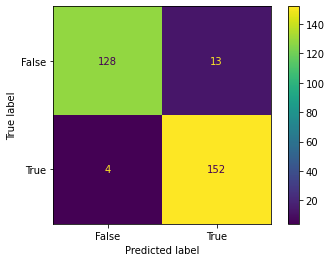

In [100]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_test)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

## AUC-ROC Curve

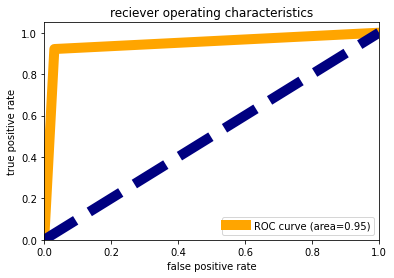

In [101]:
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label="ROC curve (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("reciever operating characteristics")
plt.legend(loc="lower right")
plt.show()

## Classification Report

In [102]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       141
           1       0.92      0.97      0.95       156

    accuracy                           0.94       297
   macro avg       0.95      0.94      0.94       297
weighted avg       0.94      0.94      0.94       297



## XGBoost Classifier

In [108]:
from xgboost import XGBClassifier
xgmod=XGBClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=26,test_size=0.25)
xgmod.fit(x_train,y_train)
pred_train=xgmod.predict(x_train)
pred_test=xgmod.predict(x_test)
xg_train_acc=round(accuracy_score(y_train,pred_train)*100,1)
xg_test_acc=round(accuracy_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",xg_train_acc)
print("\nTest Accuracy- ",xg_test_acc)


Train Accuracy-  100.0

Test Accuracy-  94.9


## Cross Validation Score

In [113]:
cv_score_best_xg=cross_val_score(xgmod,x,y,cv=10).mean()*100
print("cross validation score is-",cv_score_best_xg)
print("accuracy score for XGBoost classifier model is-",xg_test_acc)

cross validation score is- 93.19426809359697
accuracy score for XGBoost classifier model is- 94.9


## Confusion Matrix

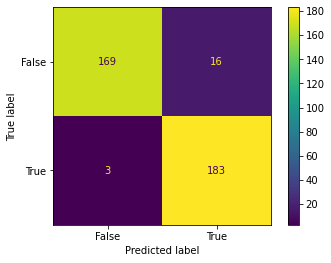

In [114]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_test)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

## AUC-ROC Curve

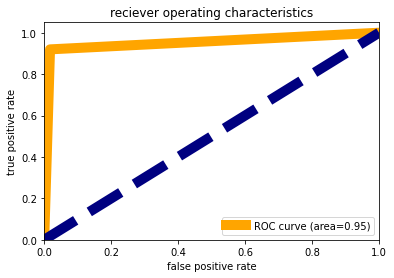

In [115]:
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label="ROC curve (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("reciever operating characteristics")
plt.legend(loc="lower right")
plt.show()

## Classification Report

In [116]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.98      0.91      0.95       185
           1       0.92      0.98      0.95       186

    accuracy                           0.95       371
   macro avg       0.95      0.95      0.95       371
weighted avg       0.95      0.95      0.95       371



## Model Summary

In [117]:
models=['Logistic Regression','Decision Tree Classifier','Knn Classifier','Random Forest Classifier','XGBoost']
test_acc=[test_accuracy,dt_acc_test,knn_test_acc,rf_test_acc,xg_test_acc]
cv_score=[cv_score_best,cv_score_best_dt,cv_score_best_knn,cv_score_best_rf,cv_score_best_xg]
dfm=pd.DataFrame(list(zip(models,test_acc,cv_score)),columns=['Models','Test Accuracy','CV Score'])
dfm

,Models,Test Accuracy,CV Score
0,Logistic Regression,75.1,74.332340
1,Decision Tree Classifier,93.3,91.109909
2,Knn Classifier,75.4,74.730388
3,Random Forest Classifier,94.3,93.329813
4,XGBoost,94.9,93.194268


There are two models with almost same performance random forest classifier and xgboost classifier. So we will choose 
random forest classifier as it uses less system resources then xgboost.

## Hyperparameter tuning on Random Forest Classifier

In [118]:
param_grid = {
    "n_estimators":[100,200,300],
    "max_depth":[10, 50, 100],
    "max_features":[6,8,10,12,14,16],
    'bootstrap': [True, False],
    "min_samples_split": [2, 6, 10]
}

rf_reg = RandomForestClassifier()

rf_reg_tuned = GridSearchCV(estimator=rf_reg,
                            param_grid=param_grid,
                            cv=3,
                            n_jobs=-1,
                            verbose=2)

rf_reg_tuned.fit(x_train, y_train)
rf_reg_tuned.best_estimator_

Fitting 3 folds for each of 324 candidates, totalling 972 fits


RandomForestClassifier(max_depth=100, max_features=14, n_estimators=200)

In [123]:
rf1=RandomForestClassifier(n_estimators=200,max_depth=100,max_features=14,bootstrap=False,min_samples_split=2)
rf1.fit(x_train,y_train)
pred_train=rf1.predict(x_train)
pred_test=rf1.predict(x_test)
train_acc=round(accuracy_score(y_train,pred_train)*100,1)
test_acc=round(accuracy_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",train_acc)
print("\nTest Accuracy- ",test_acc)


Train Accuracy-  100.0

Test Accuracy-  95.7


Accuracy increased by 1% approximately so now we will save this tunned random forest classifier model.

## Model Saving

In [124]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(rf1, open(filename, 'wb'))